In [6]:
import os
import numpy as np
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig

In [5]:
VRP_KEYS = ["ORTEC-n242-k12.vrp", "ORTEC-n323-k21.vrp", "ORTEC-n405-k18.vrp", "ORTEC-n455-k41.vrp", "ORTEC-n510-k23.vrp", "ORTEC-n701-k64.vrp", "Loggi-n401-k23.vrp", "Loggi-n501-k24.vrp", "Loggi-n601-k42.vrp", "Loggi-n601-k19.vrp", "Loggi-n901-k42.vrp", "Loggi-n1001-k31.vrp"]

In [7]:
print("IRL_HGS2 scores:")
irl_hgs_2_df = load_all_scores("logs/dataset_train_data_dimacs_HGS_0.1", range(1, 4), VRP_KEYS)
irl_hgs_2_best_score = irl_hgs_2_df.applymap(lambda x: min(x))
irl_hgs_2_overall = irl_hgs_2_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_hgs_2_overall.index = ["Min", "Max", "Mean", "Std."]
irl_hgs_2_overall.T.round(2)

IRL_HGS2 scores:


,Min,Max,Mean,Std.
ORTEC-n242-k12.vrp,123988.0,124134.0,124039.67,66.80
ORTEC-n323-k21.vrp,215759.0,216041.0,215872.67,121.44
ORTEC-n405-k18.vrp,201039.0,202317.0,201568.67,544.17
ORTEC-n455-k41.vrp,292588.0,296925.0,294172.33,1953.82
ORTEC-n510-k23.vrp,186488.0,186966.0,186765.33,202.53
ORTEC-n701-k64.vrp,448855.0,451043.0,450275.33,1005.42
Loggi-n401-k23.vrp,338267.0,342720.0,340746.00,1852.67
Loggi-n501-k24.vrp,178828.0,180171.0,179319.33,604.59
Loggi-n601-k42.vrp,350613.0,352595.0,351439.00,842.12
Loggi-n601-k19.vrp,113620.0,113793.0,113706.33,70.63


In [8]:
print("IRL_VNS2 scores:")
irl_vns_2_df = load_all_scores("logs/dataset_train_data_dimacs_VNS_0.1", range(1, 4), VRP_KEYS)
irl_vns_2_best_score = irl_vns_2_df.applymap(lambda x: min(x))
irl_vns_2_overall = irl_vns_2_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_vns_2_overall.index = ["Min", "Max", "Mean", "Std."]
irl_vns_2_overall.T.round(2)

IRL_VNS2 scores:


,Min,Max,Mean,Std.
ORTEC-n242-k12.vrp,127908.0,128157.0,128006.33,108.18
ORTEC-n323-k21.vrp,218370.0,221244.0,219640.33,1196.75
ORTEC-n405-k18.vrp,205376.0,205813.0,205542.33,193.06
ORTEC-n455-k41.vrp,297322.0,297931.0,297666.33,254.93
ORTEC-n510-k23.vrp,187444.0,188418.0,188019.00,416.65
ORTEC-n701-k64.vrp,454022.0,456991.0,455727.67,1251.79
Loggi-n401-k23.vrp,346152.0,347127.0,346759.00,432.43
Loggi-n501-k24.vrp,180615.0,182021.0,181546.67,658.82
Loggi-n601-k42.vrp,358094.0,358696.0,358446.00,256.13
Loggi-n601-k19.vrp,114400.0,115199.0,114775.33,327.98


In [18]:
def show_graphs(algo, lamb, best_scores, key_str="E-"):
    names = [x for x in VRP_KEYS if key_str in x]
    n = len(names)
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.01)
    os.makedirs(f"graphs/dataset_train_data_dimacs_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate(names):
        plotly_fig, score = instance_fig(best_scores, key, "dataset/train/data_dimacs")
        plotly_fig.write_image(f"graphs/dataset_train_data_dimacs_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200*2, width=180*2*n)
    fig.update_traces(line_width=1, marker_size=2)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("svg")

ORTEC instances:
IRL_HGS2


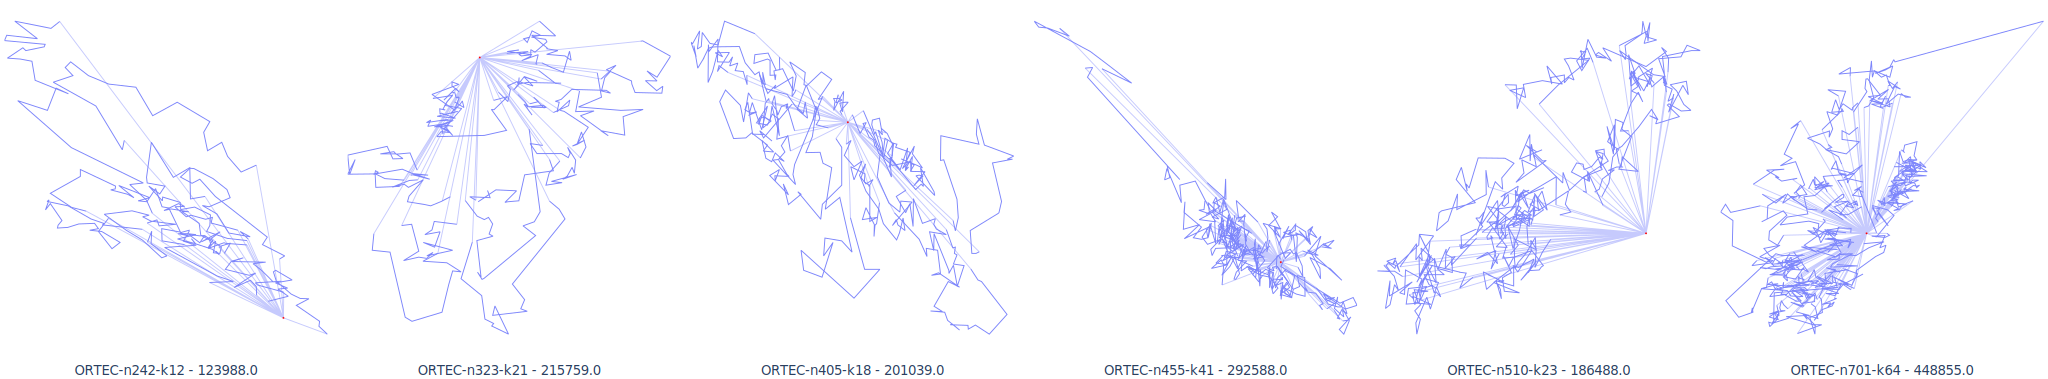

IRL_VNS2


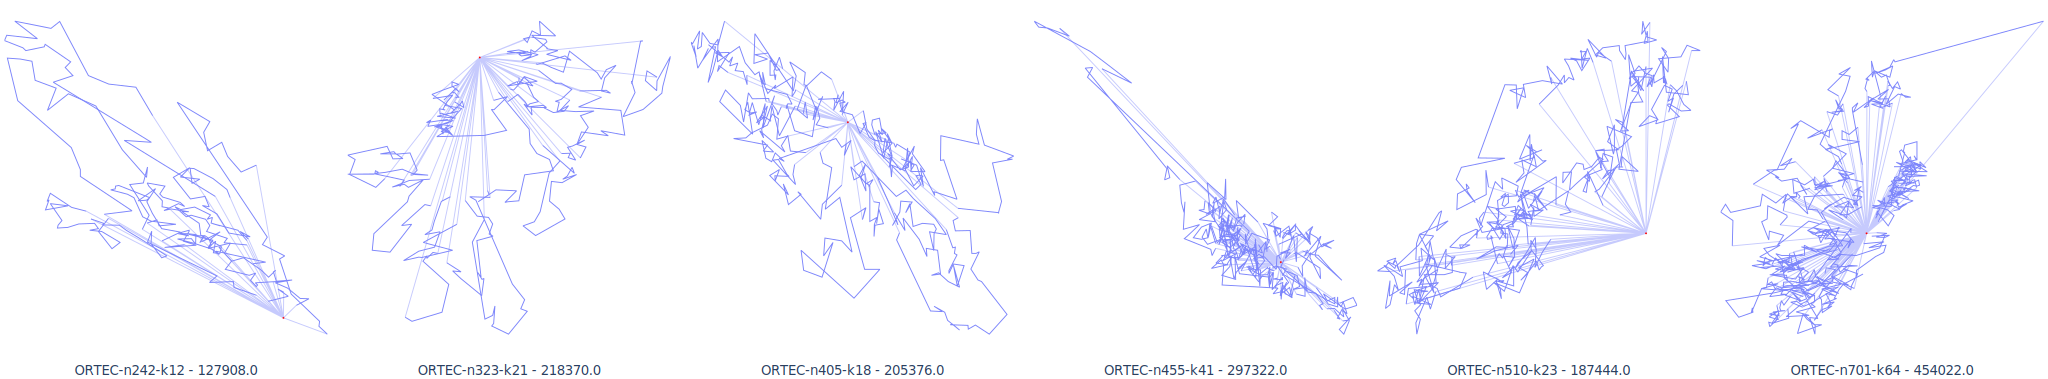

In [20]:
print("ORTEC instances:")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "ORTEC")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "ORTEC")

Loggi instances:
IRL_HGS2


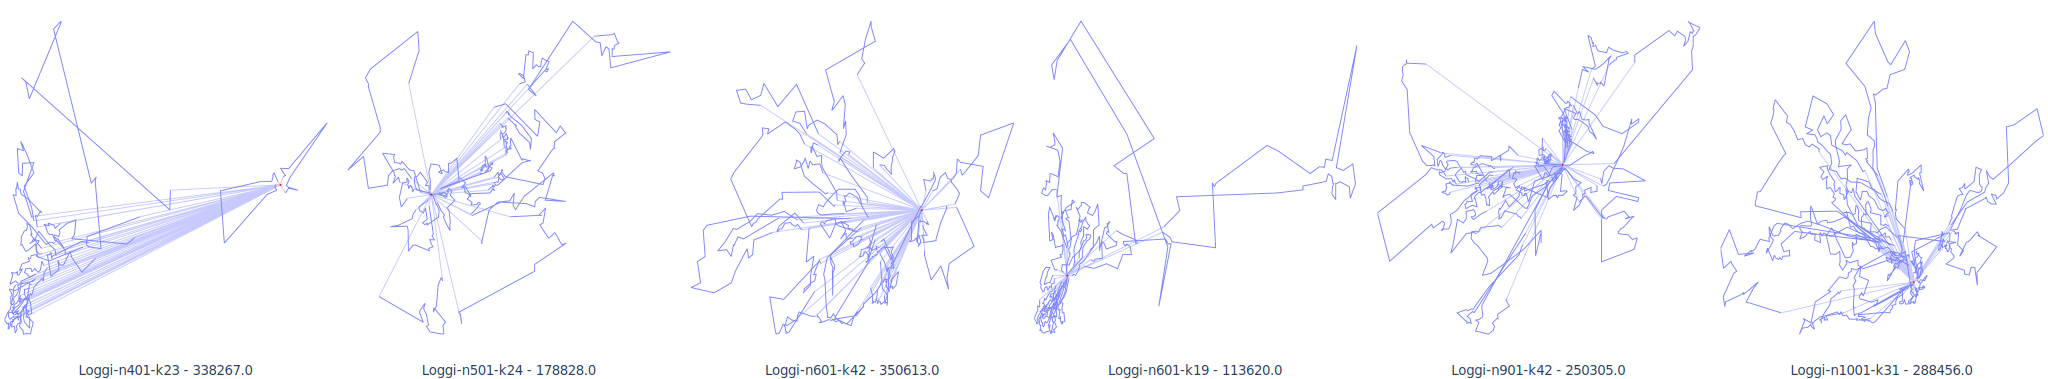

IRL_VNS2


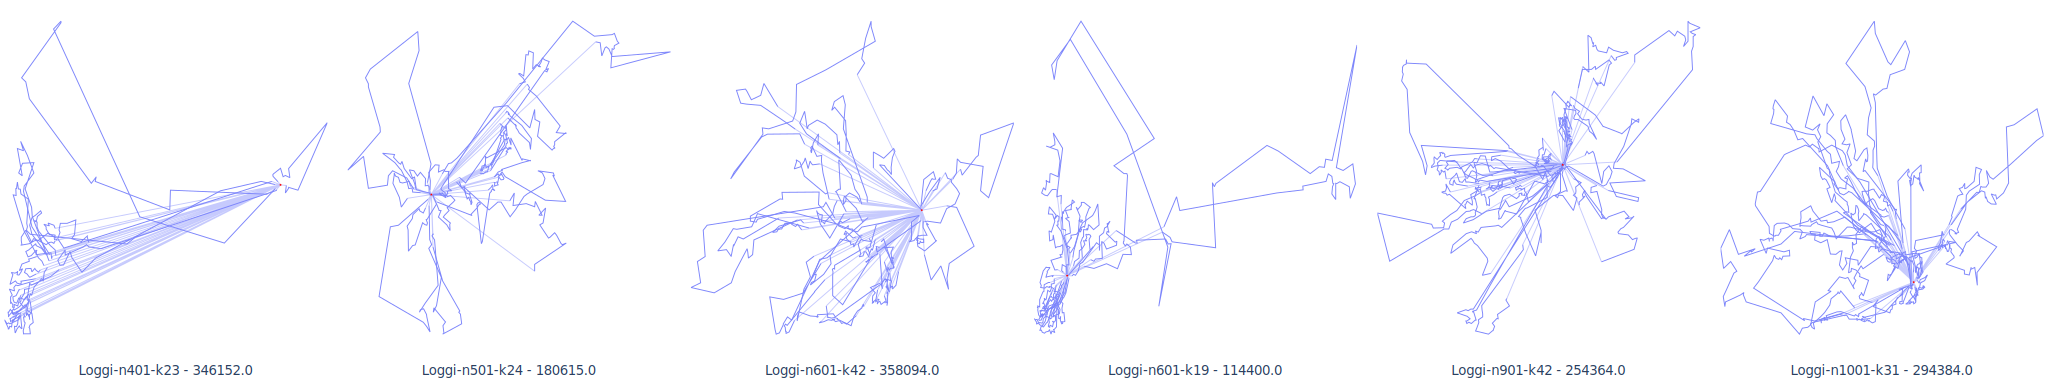

In [21]:
print("Loggi instances:")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "Loggi")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "Loggi")